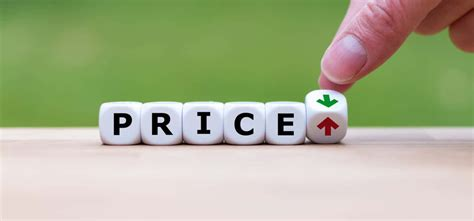

### Table of Contents
* Technical stack



* 1. Dta preprocesssing
    * 1.1 Selecting features
    * 1.2 Encoding Categorical Data
    * 1.3 Transforming skewed numerical Data
    * 1.4 Scaling
    * 1.5 Visualizing correlations
    
    

* 2. Trying different models with pycarets
    * 2.1 Data preparation for pycaret
    * 2.2 Pycaret results
    

* 3. Baseline model



* 4. Hyperparameter optimization



* 5. Bagging

###  Technical Stack

we're going to use **sklearn** for data preprocessing.

Then **pycaret** to try different models.

Finally we'll use **sklearn and optuna** to tune hyperparameters of a few selected models in bagging.

#  1. Data preprocessing

##### Loading Data

We'll use the main dataframe built during the early analysis phase. 

In [1]:
import pandas as pd

In [2]:
main_df=pd.read_csv('./main_df.csv')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   listing_id                         2941 non-null   int64  
 1   reviewsCount                       2941 non-null   int64  
 2   is_SuperHost                       2941 non-null   bool   
 3   lat                                2941 non-null   float64
 4   lng                                2941 non-null   float64
 5   CODE_IRIS                          2941 non-null   int64  
 6   NOM_COM                            2941 non-null   object 
 7   NOM_IRIS                           2941 non-null   object 
 8   housing_Type                       2941 non-null   object 
 9   personCapacity                     2941 non-null   int64  
 10  num_chambres                       2941 non-null   int64  
 11  num_lits                           2941 non-null   int64

## 1.1 Selecting useful features

In order to avoid the curse of dimensionality, we'll remove features that either are not relevant or are too shallow.

In [3]:
working_df=main_df.copy()
working_df['num_amenities']=working_df['num_amenities'].astype(int)
working_df.rename(columns = {'complete_price_per_night_per_pers':'price_per_pers','complete_price_per_night':'price',}, inplace = True)
working_df.drop(['listing_id','bookable_days','CODE_IRIS','NOM_IRIS','NOM_COM','guestSatisfactionOverall','amenities','accuracyRating','checkinRating','cleanlinessRating','communicationRating','locationRating','nightly_price','cleaning_fees','service_fees','stay_tax','computation','computation','total_price','num_guests','num_nights'],axis=1,inplace=True)

##### As we are going to use the value rating, we need to keep only listings that have at least 5 reviews.

In [4]:
working_df=working_df[working_df['reviewsCount']>5]
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 2800
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewsCount        1789 non-null   int64  
 1   is_SuperHost        1789 non-null   bool   
 2   lat                 1789 non-null   float64
 3   lng                 1789 non-null   float64
 4   housing_Type        1789 non-null   object 
 5   personCapacity      1789 non-null   int64  
 6   num_chambres        1789 non-null   int64  
 7   num_lits            1789 non-null   int64  
 8   num_sdb             1789 non-null   float64
 9   num_amenities       1789 non-null   int32  
 10  pictureCount        1789 non-null   float64
 11  valueRating         1789 non-null   float64
 12  price_per_pers      1789 non-null   float64
 13  price               1789 non-null   float64
 14  availability_ratio  1789 non-null   float64
dtypes: bool(1), float64(8), int32(1), int64(4), object(1)
m

In [5]:
working_df.isna().count()

reviewsCount          1789
is_SuperHost          1789
lat                   1789
lng                   1789
housing_Type          1789
personCapacity        1789
num_chambres          1789
num_lits              1789
num_sdb               1789
num_amenities         1789
pictureCount          1789
valueRating           1789
price_per_pers        1789
price                 1789
availability_ratio    1789
dtype: int64

##### We don't have a null value.

## 1.2 Encoding Categorical Data 

##### Encoding non_numerial or boolean features

In [6]:
working_df=pd.get_dummies(working_df)

In [7]:
pip install scikit-learn==0.23.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\amaur\\anaconda3\\envs\\geop\\lib\\site-packages\\numpy-1.22.2.dist-info\\METADATA'



In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##### Encoding boolean features

In [9]:
le = LabelEncoder()
working_df['is_SuperHost']=le.fit_transform(working_df['is_SuperHost'])
working_df=working_df.reset_index()

## 1.3 Transforming skewed numerical Data

In [10]:
pip install Scipy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\amaur\\anaconda3\\envs\\geop\\lib\\site-packages\\numpy-1.22.2.dist-info\\METADATA'



In [11]:
import numpy as np
import scipy
from scipy.stats import skew

##### Checking for skewness ( |Skew| > 0.5 )

In [12]:
skew(working_df['reviewsCount'])

3.3409935344843564

In [13]:
skew(working_df['num_amenities'])

0.5097128062212858

In [14]:
working_df['reviewsCount']=np.log1p(working_df['reviewsCount'])
working_df['num_amenities']=np.log1p(working_df['num_amenities'])

### Splitting the Data

##### We want to predict price, this is our dependant variable.

In [15]:
X_df=working_df.drop('price',axis=1)
Y_df=working_df['price']

##### We also want to randomly split our dataset in a train set (to fit our model) and a test set (to evaluate our model)

In [16]:
X_cols=X_df.columns
X = X_df.values
y = Y_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train[0], X_test[0], y_train[0], y_test[0])

[295.           2.83321334   0.         -21.36        55.52
   2.           1.           1.           1.           3.8918203
  17.           4.8         58.92857143   1.           0.
   0.           0.           0.           0.           0.
   0.           0.           1.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.        ] [ 1.89400000e+03  3.21887582e+00  1.00000000e+00 -2.11600000e+01
  5.58300000e+01  6.00000000e+00  3.00000000e+00  3.00000000e+00
  1.00000000e+00  3.46573590e+00  6.00000000e+00  4.71000000e+00
  2.48333333e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

## 1.4 Scaling based on training Data

##### To improve training efficiency we can scale our data

In [17]:
scaler=StandardScaler()

##### We first select the numeric features

In [18]:
train_df=pd.DataFrame(X_train,columns=X_cols)
test_df=pd.DataFrame(X_test,columns=X_cols)
numeric_columns=['reviewsCount','lat', 'lng', 'personCapacity',
       'num_chambres', 'num_lits', 'num_sdb', 'num_amenities', 'pictureCount',
       'valueRating','availability_ratio']
train_df_numeric=train_df[numeric_columns].copy()
train_df_non_numeric=train_df.drop(numeric_columns,axis=1).copy()
test_df_numeric=test_df[numeric_columns].copy()
test_df_non_numeric=test_df.drop(numeric_columns,axis=1).copy()
print(train_df_numeric)

      reviewsCount    lat    lng  personCapacity  num_chambres  num_lits  \
0         2.833213 -21.36  55.52             2.0           1.0       1.0   
1         1.945910 -21.33  55.48             7.0           3.0       4.0   
2         4.418841 -21.10  55.25             4.0           1.0       2.0   
3         2.995732 -20.98  55.32             6.0           3.0       3.0   
4         4.595120 -21.21  55.29             2.0           1.0       1.0   
...            ...    ...    ...             ...           ...       ...   
1426      3.688879 -21.13  55.63             4.0           3.0       3.0   
1427      3.091042 -21.33  55.53             4.0           2.0       3.0   
1428      3.178054 -21.38  55.60             2.0           1.0       1.0   
1429      4.276666 -21.13  55.47             2.0           1.0       1.0   
1430      2.302585 -20.90  55.46             2.0           1.0       1.0   

      num_sdb  num_amenities  pictureCount  valueRating  availability_ratio  
0        

##### We then fit the scaler on the training set only (in order not to leak any data from the test set) and then scale the train and test sets

In [19]:
scaler.fit(train_df_numeric)
train_df_numeric=pd.DataFrame(scaler.transform(train_df_numeric),columns=numeric_columns)
test_df_numeric=pd.DataFrame(scaler.transform(test_df_numeric),columns=numeric_columns)

##### We then merge back with non numeric features

In [20]:
X_train_scaled=pd.concat([train_df_numeric,train_df_non_numeric],axis=1).values
X_test_scaled=pd.concat([test_df_numeric,test_df_non_numeric],axis=1).values

## 1.5 Visualizing correlations

In [21]:
import seaborn as sns

In [22]:
scaled_numerics=pd.concat([train_df_numeric,test_df_numeric],axis=0)
Y_cols=['price']
y_train_df=pd.DataFrame(y_train,columns=Y_cols)
y_test_df=pd.DataFrame(y_test,columns=Y_cols)
price_df= pd.concat([y_train_df,y_test_df],axis=0)
correlations_df=pd.concat([scaled_numerics,price_df],axis=1)

<AxesSubplot:>

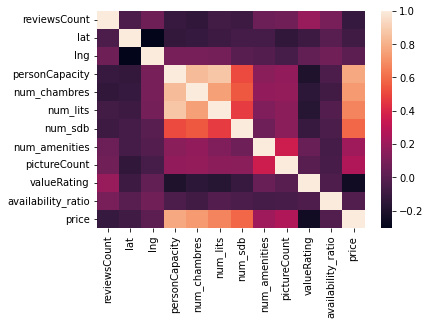

In [23]:
sns.heatmap(correlations_df.corr())

Except maybe for num_amenities and pictureCOunt, there seems to be no need to remove features that are too much correlated. 

# 2. Trying different models

##  2.1 Merging X and Y for pycaret

In [24]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pycaret.regression import setup,compare_models

##### We'll use pycaret to train and test many different models to see which ones perform best on our data. First, process the data in the format expected by pycaret

In [26]:
X_cols=train_df_numeric.columns.tolist() + train_df_non_numeric.columns.tolist()
X_cols
Y_cols=['price']
train=pd.DataFrame(X_train_scaled,columns=X_cols)
test=pd.DataFrame(y_train,columns=Y_cols)
train_data=pd.concat([train,test],axis=1)
print(train_data)

      reviewsCount       lat       lng  personCapacity  num_chambres  \
0        -0.447980 -1.410078  0.801816       -0.781872     -0.628552   
1        -1.477788 -1.212865  0.493789        1.326000      1.515568   
2         1.392306  0.299105 -1.277362        0.061277     -0.628552   
3        -0.259360  1.087958 -0.738316        0.904426      1.515568   
4         1.596897 -0.424011 -0.969336       -0.781872     -0.628552   
...            ...       ...       ...             ...           ...   
1426      0.545110  0.101891  1.648888        0.061277      1.515568   
1427     -0.148743 -1.212865  0.878822        0.061277      0.443508   
1428     -0.047757 -1.541554  1.417868       -0.781872     -0.628552   
1429      1.227298  0.101891  0.416783       -0.781872     -0.628552   
1430     -1.063830  1.613861  0.339776       -0.781872     -0.628552   

      num_lits   num_sdb  num_amenities  pictureCount  valueRating  \
0    -0.697893 -0.315855       1.172330     -0.009800     0.40025

## 2.2 Use pycaret compare_models to get an overview of models performance on the Data

In [27]:
setup(data=train_data,target='price')
results=compare_models()
print(results)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.4300,105.7440,9.6295,0.9871,0.0461,0.0316,0.0550
rf,Random Forest Regressor,4.6197,230.2905,14.0009,0.9725,0.0706,0.0295,0.1250
et,Extra Trees Regressor,4.6845,262.2502,14.9888,0.9687,0.0716,0.0298,0.1090
lightgbm,Light Gradient Boosting Machine,7.7734,375.4188,18.4806,0.9541,0.1091,0.0615,0.0240
dt,Decision Tree Regressor,6.4847,421.2997,19.6363,0.9451,0.0922,0.0372,0.0040
lasso,Lasso Regression,16.3730,768.4158,27.2315,0.9019,0.2929,0.1639,0.0050
br,Bayesian Ridge,16.5175,762.2795,27.2132,0.9017,0.3007,0.1662,0.0050
ridge,Ridge Regression,16.5806,765.7958,27.2926,0.9010,0.3075,0.1673,0.0040
lr,Linear Regression,16.6404,769.5395,27.3678,0.9005,0.3111,0.1681,0.4650
omp,Orthogonal Matching Pursuit,16.4548,793.1172,27.7398,0.8983,0.3220,0.1684,0.0040


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8332, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


We can see that tree based algorithms perform well on our data. We'll keep ExtraTreesRegressor as our tree based baseline model. We'll also select the 2 best linear models to see if we can improve predictions when associated to the baseline model

# 3. Baseline Model

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

##### We use the paramters from pycaret as tree based models are not easy to tune.

In [29]:
baseline_model=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1499, verbose=0, warm_start=False)

In [30]:
baseline_model.fit(X_train_scaled, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1499, verbose=0, warm_start=False)

In [31]:
y_pred=baseline_model.predict(X_test_scaled)

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9481187398443469


In [33]:
for index in range(len(y_test)):
    print(y_test[index],'-----',y_pred[index],'-----',y_test[index]-y_pred[index])

149.0 ----- 148.2930158730158 ----- 0.7069841269841959
136.28571428571428 ----- 139.30142857142854 ----- -3.0157142857142674
159.0 ----- 159.95523809523803 ----- -0.9552380952380304
34.42857142857143 ----- 34.12047619047619 ----- 0.3080952380952411
76.0 ----- 76.14904761904764 ----- -0.14904761904763575
66.71428571428571 ----- 66.70142857142856 ----- 0.012857142857143344
194.28571428571428 ----- 196.7038095238096 ----- -2.418095238095333
237.7142857142857 ----- 242.87428571428572 ----- -5.160000000000025
137.0 ----- 136.93857142857144 ----- 0.06142857142856428
219.0 ----- 218.0014285714285 ----- 0.9985714285714948
70.28571428571429 ----- 72.3012698412699 ----- -2.0155555555556077
108.71428571428572 ----- 110.03015873015869 ----- -1.3158730158729668
58.888888888888886 ----- 58.85714285714285 ----- 0.03174603174603874
62.85714285714285 ----- 62.85857142857145 ----- -0.0014285714286046414
87.14285714285714 ----- 87.1185714285715 ----- 0.024285714285639415
398.8571428571428 ----- 415.71111

# 4. Hyperparameter optimization

In [34]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [35]:
import optuna

In [36]:
from sklearn.linear_model import Lasso,HuberRegressor

In [37]:
import matplotlib.pyplot as plt
from scipy import stats

### Lasso

In [38]:
def lasso_objective(trial):

    tol=trial.suggest_loguniform('tol', 1e-8, 10.0)
#     default=1e-4
#     The tolerance for the optimization: if the updates are smaller than tol, 
#     the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

    model = Lasso(
        tol=tol,
    )

    model.fit(X_train_scaled, y_train)

    br_prediction=model.predict(X_test_scaled)
    br_r2_score = r2_score(y_test, br_prediction)

    return br_r2_score

In [39]:
study = optuna.create_study(direction='minimize')

[I 2022-02-23 09:47:45,343] A new study created in memory with name: no-name-244952fb-b5a9-4ba3-a096-2bbc071ab519


In [40]:
study.optimize(lasso_objective, n_trials=100)

[I 2022-02-23 09:47:45,365] Trial 0 finished with value: 0.8811839590998353 and parameters: {'tol': 0.00029117594318855353}. Best is trial 0 with value: 0.8811839590998353.
[I 2022-02-23 09:47:45,370] Trial 1 finished with value: 0.8811839590998353 and parameters: {'tol': 0.0002152773533105755}. Best is trial 0 with value: 0.8811839590998353.
[I 2022-02-23 09:47:45,373] Trial 2 finished with value: 0.881257479074652 and parameters: {'tol': 0.00552952531901334}. Best is trial 0 with value: 0.8811839590998353.
[I 2022-02-23 09:47:45,377] Trial 3 finished with value: 0.8816275098763748 and parameters: {'tol': 0.3329375480119228}. Best is trial 0 with value: 0.8811839590998353.
[I 2022-02-23 09:47:45,380] Trial 4 finished with value: 0.8806935395620819 and parameters: {'tol': 0.11620663037684154}. Best is trial 4 with value: 0.8806935395620819.
[I 2022-02-23 09:47:45,385] Trial 5 finished with value: 0.8811783336331213 and parameters: {'tol': 1.808242321592391e-06}. Best is trial 4 with va

[I 2022-02-23 09:47:45,753] Trial 45 finished with value: 0.8653937938585319 and parameters: {'tol': 1.7229137308657274}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:45,762] Trial 46 finished with value: 0.8806935395620819 and parameters: {'tol': 0.10182661952293746}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:45,770] Trial 47 finished with value: 0.8816275098763748 and parameters: {'tol': 0.8723840530295405}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:45,777] Trial 48 finished with value: 0.8653937938585319 and parameters: {'tol': 3.254724573012657}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:45,787] Trial 49 finished with value: 0.8816275098763748 and parameters: {'tol': 0.21579711351249597}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:45,801] Trial 50 finished with value: 0.8653937938585319 and parameters: {'tol': 4.252579026953811}. Best is trial 9 with value: 

[I 2022-02-23 09:47:46,148] Trial 90 finished with value: 0.8653937938585319 and parameters: {'tol': 1.9524347407017009}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:46,157] Trial 91 finished with value: 0.8653937938585319 and parameters: {'tol': 1.0357950533428864}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:46,166] Trial 92 finished with value: 0.8653937938585319 and parameters: {'tol': 4.95218239980136}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:46,173] Trial 93 finished with value: 0.8653937938585319 and parameters: {'tol': 7.502812176302466}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:46,180] Trial 94 finished with value: 0.8816275098763748 and parameters: {'tol': 0.23361878915426193}. Best is trial 9 with value: 0.8653937938585319.
[I 2022-02-23 09:47:46,186] Trial 95 finished with value: 0.8653937938585319 and parameters: {'tol': 1.5550017845583701}. Best is trial 9 with value: 0.

In [41]:
lasso_params=study.best_params

### HuberRegressor

In [42]:
def HR_objective(trial):


    epsilon=1+trial.suggest_loguniform('epsilon', 1, 10.0)
    # float, greater than 1.0, default=1.35
    # The parameter epsilon controls the number of samples that should be classified as outliers. 
    # The smaller the epsilon, the more robust it is to outliers.

    max_iter = trial.suggest_int('max_iter', 50, 600)
    # int, default=100
    # Maximum number of iterations that scipy.optimize.minimize(method="L-BFGS-B") should run for.

    alpha=trial.suggest_loguniform('alpha', 1e-6, 1.0)
    # float, default=0.0001
    # Regularization parameter.

    tol=trial.suggest_loguniform('tol', 1e-8, 10.0)
#     float, default=1e-05
#     The iteration will stop when max{|proj g_i | i = 1, ..., n} <= tol where pg_i is the i-th component of the projected gradient.

    model = HuberRegressor(
        epsilon=epsilon,
        max_iter=max_iter,
        alpha=alpha,
        tol=tol,
    )

    model.fit(X_train_scaled, y_train)

    br_prediction=model.predict(X_test_scaled)
    br_r2_score = r2_score(y_test, br_prediction)

    return br_r2_score

In [43]:
study = optuna.create_study(direction='minimize')

[I 2022-02-23 09:47:46,265] A new study created in memory with name: no-name-a9801ad8-d9fc-4c9c-bcb2-b3b6d9e724b1


In [44]:
study.optimize(HR_objective, n_trials=100)

[I 2022-02-23 09:47:46,487] Trial 0 finished with value: 0.8857895993626181 and parameters: {'epsilon': 7.1408171483978045, 'max_iter': 219, 'alpha': 0.0003586557923863666, 'tol': 1.0988691154862513e-05}. Best is trial 0 with value: 0.8857895993626181.
[I 2022-02-23 09:47:46,878] Trial 1 finished with value: 0.8758368523405323 and parameters: {'epsilon': 1.2346383307518303, 'max_iter': 443, 'alpha': 2.0025544979190584e-06, 'tol': 0.0008864468343445115}. Best is trial 1 with value: 0.8758368523405323.
[I 2022-02-23 09:47:47,138] Trial 2 finished with value: 0.8790883101800421 and parameters: {'epsilon': 1.8372555900437504, 'max_iter': 492, 'alpha': 1.1665945451265889e-05, 'tol': 1.892701144460281}. Best is trial 1 with value: 0.8758368523405323.
[I 2022-02-23 09:47:47,586] Trial 3 finished with value: 0.8751635232709121 and parameters: {'epsilon': 1.1675242910783847, 'max_iter': 499, 'alpha': 0.03775878252650749, 'tol': 2.6920288752612442e-08}. Best is trial 3 with value: 0.875163523270

[I 2022-02-23 09:47:57,378] Trial 31 finished with value: 0.8756707429784285 and parameters: {'epsilon': 1.2245893596062833, 'max_iter': 267, 'alpha': 0.000266255232251379, 'tol': 0.0028614841973301254}. Best is trial 26 with value: 0.8735522681206876.
[I 2022-02-23 09:47:57,675] Trial 32 finished with value: 0.8737024087022693 and parameters: {'epsilon': 1.0207203802357203, 'max_iter': 315, 'alpha': 5.565144399060808e-05, 'tol': 0.00995542541974851}. Best is trial 26 with value: 0.8735522681206876.
[I 2022-02-23 09:47:58,012] Trial 33 finished with value: 0.8756087978845599 and parameters: {'epsilon': 1.2355147757019231, 'max_iter': 333, 'alpha': 1.6907310494413644e-06, 'tol': 0.016690702718170025}. Best is trial 26 with value: 0.8735522681206876.
[I 2022-02-23 09:47:58,361] Trial 34 finished with value: 0.8733876177696941 and parameters: {'epsilon': 1.002891720544011, 'max_iter': 231, 'alpha': 6.174547850091551e-06, 'tol': 0.8794366005069683}. Best is trial 34 with value: 0.873387617

[I 2022-02-23 09:48:08,404] Trial 62 finished with value: 0.8740306304464454 and parameters: {'epsilon': 1.0127490460644015, 'max_iter': 178, 'alpha': 0.0022732197507359746, 'tol': 1.1052449161733264}. Best is trial 34 with value: 0.8733876177696941.
[I 2022-02-23 09:48:08,615] Trial 63 finished with value: 0.875427211037716 and parameters: {'epsilon': 1.1738405980053166, 'max_iter': 213, 'alpha': 0.00012091959751345612, 'tol': 3.6076882216540893}. Best is trial 34 with value: 0.8733876177696941.
[I 2022-02-23 09:48:08,930] Trial 64 finished with value: 0.8736536140907969 and parameters: {'epsilon': 1.0103070899896238, 'max_iter': 264, 'alpha': 2.216392937882947e-05, 'tol': 0.0022618650691552757}. Best is trial 34 with value: 0.8733876177696941.
[I 2022-02-23 09:48:09,302] Trial 65 finished with value: 0.8743477500021669 and parameters: {'epsilon': 1.085312378834003, 'max_iter': 261, 'alpha': 3.066267348646113e-06, 'tol': 0.0016077681451273581}. Best is trial 34 with value: 0.873387617

[I 2022-02-23 09:48:17,219] Trial 93 finished with value: 0.8740708450054943 and parameters: {'epsilon': 1.0048123332737156, 'max_iter': 258, 'alpha': 0.00010029812020930756, 'tol': 9.89469704692553e-05}. Best is trial 81 with value: 0.8733380275636682.
[I 2022-02-23 09:48:17,664] Trial 94 finished with value: 0.8751013685163849 and parameters: {'epsilon': 1.1475667021559997, 'max_iter': 236, 'alpha': 0.00032142759315904407, 'tol': 1.470122749343124e-07}. Best is trial 81 with value: 0.8733380275636682.
[I 2022-02-23 09:48:18,127] Trial 95 finished with value: 0.8857427430396064 and parameters: {'epsilon': 7.7525730267543205, 'max_iter': 309, 'alpha': 0.001159829539834354, 'tol': 0.004094886127966323}. Best is trial 81 with value: 0.8733380275636682.
[I 2022-02-23 09:48:18,402] Trial 96 finished with value: 0.8743723920160232 and parameters: {'epsilon': 1.055715178749529, 'max_iter': 182, 'alpha': 2.261668870676065e-05, 'tol': 0.3243628814860335}. Best is trial 81 with value: 0.8733380

In [45]:
HR_params=study.best_params

# 5. Bagging

In [46]:
lasso_params

{'tol': 2.2992787870433973}

In [47]:
HR_params

{'epsilon': 1.0015508331730387,
 'max_iter': 266,
 'alpha': 5.574115232321828e-05,
 'tol': 0.004011372026408464}

## Dict of models

In [48]:
models={
    'Lasso':Lasso(**lasso_params), 
    'HR':HuberRegressor(**HR_params),
}

## Fitting models with tuned parameters

In [49]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    print(name)

Lasso
HR


## Assessing models 

In [50]:
from sklearn.metrics import r2_score
r2_scores={}
print(r2_score)
for name,model in models.items():
    prediction=model.predict(X_test_scaled)
    r2_score_compute = r2_score(y_test, prediction)
    r2_scores[name]=r2_score_compute

print(r2_scores)

<function r2_score at 0x000001AEFF2400D0>
{'Lasso': 0.8653937938585319, 'HR': 0.8665182300903739}


## Combining predictions

In [51]:
final_prediction=(0.5*baseline_model.predict(X_test_scaled)
                  +0.25*models['Lasso'].predict(X_test_scaled)
                  +0.25*models['HR'].predict(X_test_scaled)
                 )

In [52]:
r2_score_combination = r2_score(y_test, final_prediction)
print(r2_score_combination)

0.9279290475957248


In [53]:
final_prediction=(0.5*baseline_model.predict(X_test_scaled)
                  +0.5*models['HR'].predict(X_test_scaled)
                 )
r2_score_combination = r2_score(y_test, final_prediction)
print(r2_score_combination)

0.9227639340740528


In [54]:
final_prediction=(0.5*baseline_model.predict(X_test_scaled)
                  +0.5*models['Lasso'].predict(X_test_scaled)
                 )

r2_score_combination = r2_score(y_test, final_prediction)
print(r2_score_combination)

0.9274634854009579


We're are not able to improve our r2 score with bagging (0.95 for ExtraTreesRegressor alone). But we can anlyse our lasso model coefs more easily than the ExtraTreesRegressor which is an ensemnle method.

## Plotting coeffs

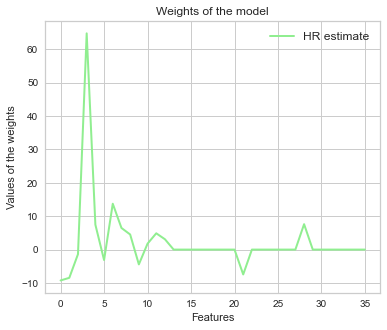

In [55]:
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(models['Lasso'].coef_, color="lightgreen", linewidth=lw, label="HR estimate")
# plt.plot(w, color="gold", linewidth=lw, label="Ground truth")
# plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

##### We can see that a majority of coefficients are not significant. We want to visulize the main ones.

In [56]:
rounded_coef=np.round(models['Lasso'].coef_,1)

In [57]:
rounded_coef_df=pd.DataFrame(rounded_coef,index=X_cols,columns=['coefs'])

In [58]:
rounded_coef_df['abs_coefs']=np.abs(rounded_coef_df['coefs'])
top_coefs=rounded_coef_df[rounded_coef_df['abs_coefs']>3]
top_coefs

,coefs,abs_coefs
reviewsCount,-9.2,9.2
lat,-8.5,8.5
personCapacity,64.7,64.7
num_chambres,7.5,7.5
num_lits,-3.1,3.1
num_sdb,13.7,13.7
num_amenities,6.5,6.5
pictureCount,4.5,4.5
valueRating,-4.4,4.4
is_SuperHost,4.9,4.9


##### Insights from coefs:

- As expected the capacity is the main driver for price (along with and correlated with the number of bedrooms and bathrooms).

- Being a superhost and displaying many pictures also seem to reassure guests and drive price up. 

- What's more surprising is that latitude is negatively correlated (south is cheaper). But longitude is not significant whereas the west is the touristic part of the Island. Purchasing a house east could be a good opportunity (less expansive but rented at the same price)

- As expected number of reviews is negatively correlated to price as lower price drive occupancy. Same thing with value rating that confirms that listings with high value ratings are probably a bit underpriced. 

**As a conclusion**, this algorithm could be a good start to evaluate the price or set the price of ones' listing.